In [1]:
import pandas as pd
import pathlib
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
oddsratio_cutoff = 1.3
lgp_cutoff = 8

## Motif Info

In [3]:
motif_gene_anno = pd.read_csv(
    '/home/hanliu/ref/MEME/selected_motifs_sets/JASPAR2020_CORE_vertebrates_non-redundant.mouse_genes.csv', 
    index_col=0
)

## Agg motif enrichment

In [4]:
output_dir = f'./OpenDMR/'
output_path = f'OpenDMR.total_enrichment.msg'

In [ ]:
output_dir = pathlib.Path(output_dir)
enrich_files = list(output_dir.glob('*motif_enrichment.msg'))
total_result = pd.concat([pd.read_msgpack(p) for p in enrich_files])

filtered_result = total_result[(total_result['oddsratio'] > oddsratio_cutoff) & 
                               (total_result['-lgp'] > lgp_cutoff)]

motif_gene_info = filtered_result.index.map(lambda i: motif_gene_anno.loc[i])
motif_gene_info = pd.DataFrame(motif_gene_info.tolist())
total_result = pd.concat([filtered_result, motif_gene_info], axis=1)

total_result.to_msgpack(output_path)

In [5]:
total_result = pd.read_msgpack(output_path)

## Plot TE

In [6]:
subtype_order = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/order/SubType.order.txt',
                            index_col=0, header=None).index

In [8]:
motif_order = sorted(set(total_result['motif_name']))
len(motif_order)

516

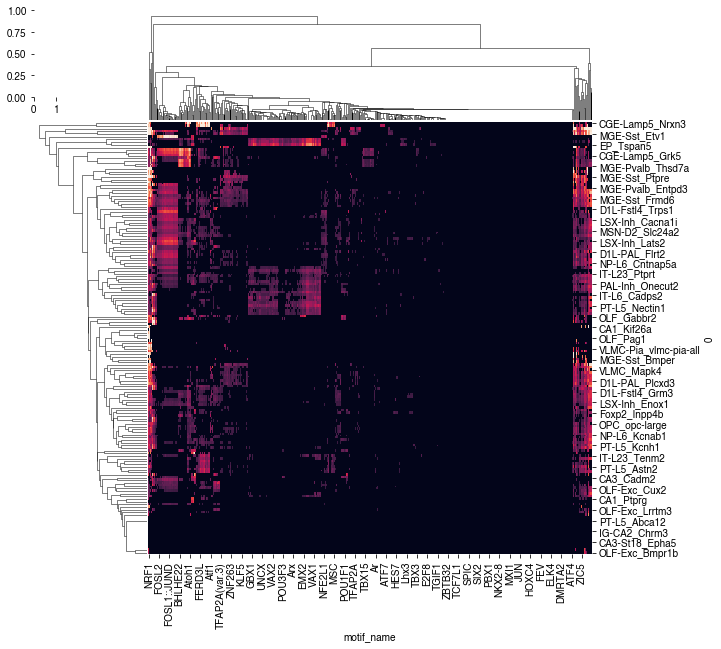

In [18]:
ax.set(title='Hyper Open')

data = total_result[total_result['DMRType'] == 'Hyper'].set_index(['SubType', 'motif_name'])['oddsratio'].unstack()
data = data.reindex(subtype_order).T.reindex(motif_order).T.fillna(1)

sns.clustermap(data, cbar=None, vmin=1, vmax=3, figsize=(10, 10))

In [24]:
sig_times = total_result.groupby(['gene_names', 'DMRType']).apply(lambda i: i.shape[0]).unstack()

In [32]:
sig_times[(sig_times['Hyper'] - sig_times['Hypo']) > 50]

DMRType,Hyper,Hypo
gene_names,,
Ctcf,125.0,3.0
Ctcfl,116.0,14.0
E2f1,72.0,8.0
E2f2,85.0,11.0
E2f4,74.0,10.0
Egr1,87.0,26.0
Egr3,108.0,51.0
Egr4,89.0,22.0
Hinfp,93.0,11.0


In [37]:
total_result[total_result['gene_names'] == 'Ctcf']

,oddsratio,p_value,adj_p,-lgp,tp,tn,fp,fn,tp_rate,fp_rate,SubType,DMRType,motif_name,motif_genes,gene_ids,gene_names
MA0139.1,2.267058,4.180608e-82,3.005857e-79,78.522032,956.0,1684.0,69321.0,276829.0,0.362121,0.200263,MGE-Sst_Rxra,Hyper,CTCF,CTCF,ENSMUSG00000005698.15,Ctcf
MA0139.1,2.173038,4.449675e-13,4.570452e-11,10.340041,146.0,268.0,69508.0,277258.0,0.352657,0.200446,Unc5c_Unc5c,Hyper,CTCF,CTCF,ENSMUSG00000005698.15,Ctcf
MA0139.1,1.808531,5.161380e-162,1.237011e-159,158.907627,3425.0,7577.0,68741.0,275029.0,0.311307,0.199962,ODC_odc-small,Hyper,CTCF,CTCF,ENSMUSG00000005698.15,Ctcf
MA0139.1,1.673431,6.216061e-13,2.234674e-11,10.650786,295.0,703.0,69502.0,277165.0,0.295591,0.200486,PC_pc-all,Hyper,CTCF,CTCF,ENSMUSG00000005698.15,Ctcf
MA0139.1,1.801782,2.266561e-147,4.074143e-145,144.389964,3137.0,6967.0,68790.0,275270.0,0.310471,0.199936,ODC_odc-large,Hyper,CTCF,CTCF,ENSMUSG00000005698.15,Ctcf
MA0139.1,1.574256,3.929939e-82,1.345536e-80,79.871105,2753.0,6995.0,68723.0,274890.0,0.282417,0.200001,IT-L5_Etv1,Hyper,CTCF,CTCF,ENSMUSG00000005698.15,Ctcf
MA0139.1,1.321059,1.606030e-10,5.498740e-09,8.259737,723.0,2183.0,69372.0,276708.0,0.248796,0.200451,CA1_Ptprg,Hyper,CTCF,CTCF,ENSMUSG00000005698.15,Ctcf
MA0139.1,2.114591,1.855823e-32,1.482597e-30,29.828977,421.0,795.0,69390.0,277082.0,0.346217,0.200276,MGE-Sst_Ptpre,Hyper,CTCF,CTCF,ENSMUSG00000005698.15,Ctcf
MA0139.1,1.374008,3.060820e-14,2.716950e-13,12.565918,803.0,2332.0,69373.0,276817.0,0.256140,0.200390,CGE-Lamp5_Dock5,Hyper,CTCF,CTCF,ENSMUSG00000005698.15,Ctcf
MA0139.1,1.512178,7.306825e-72,1.050721e-69,68.978512,2849.0,7531.0,68782.0,274940.0,0.274470,0.200109,CT-L6_Megf9,Hyper,CTCF,CTCF,ENSMUSG00000005698.15,Ctcf
